In [1]:
#importing lib
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('mymoviedb.csv', lineterminator='\n')
df.head()

,Release_Date,Title,Overview,Popularity,Vote_Count,Vote_Average,Original_Language,Genre,Poster_Url
0,2021-12-15,Spider-Man: No Way Home,Peter Parker is unmasked and no longer able to...,5083.954,8940,8.3,en,"Action, Adventure, Science Fiction",https://image.tmdb.org/t/p/original/1g0dhYtq4i...
1,2022-03-01,The Batman,"In his second year of fighting crime, Batman u...",3827.658,1151,8.1,en,"Crime, Mystery, Thriller",https://image.tmdb.org/t/p/original/74xTEgt7R3...
2,2022-02-25,No Exit,Stranded at a rest stop in the mountains durin...,2618.087,122,6.3,en,Thriller,https://image.tmdb.org/t/p/original/vDHsLnOWKl...
3,2021-11-24,Encanto,"The tale of an extraordinary family, the Madri...",2402.201,5076,7.7,en,"Animation, Comedy, Family, Fantasy",https://image.tmdb.org/t/p/original/4j0PNHkMr5...
4,2021-12-22,The King's Man,As a collection of history's worst tyrants and...,1895.511,1793,7.0,en,"Action, Adventure, Thriller, War",https://image.tmdb.org/t/p/original/aq4Pwv5Xeu...


In [3]:
#viewing dataset info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9827 entries, 0 to 9826
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Release_Date       9827 non-null   object 
 1   Title              9827 non-null   object 
 2   Overview           9827 non-null   object 
 3   Popularity         9827 non-null   float64
 4   Vote_Count         9827 non-null   int64  
 5   Vote_Average       9827 non-null   float64
 6   Original_Language  9827 non-null   object 
 7   Genre              9827 non-null   object 
 8   Poster_Url         9827 non-null   object 
dtypes: float64(2), int64(1), object(6)
memory usage: 691.1+ KB


= looks like our dataset has no NaNs! - Overview, Orignal_Language and Poster-Url wouldnt be so useful during analysis - Release_Date column needs to be casted into data time and to extract only the year value

In [4]:
#exploring genres column
df['Genre'].head()

0    Action, Adventure, Science Fiction
1              Crime, Mystery, Thriller
2                              Thriller
3    Animation, Comedy, Family, Fantasy
4      Action, Adventure, Thriller, War
Name: Genre, dtype: object

In [5]:
#check for duplicated rows
df.duplicated().sum()

np.int64(0)

- our dataset has no duplicated rows either

In [6]:
#exploring summary stastics
df.describe()

,Popularity,Vote_Count,Vote_Average
count,9827.000000,9827.000000,9827.000000
mean,40.326088,1392.805536,6.439534
std,108.873998,2611.206907,1.129759
min,13.354000,0.000000,0.000000
25%,16.128500,146.000000,5.900000
50%,21.199000,444.000000,6.500000
75%,35.191500,1376.000000,7.100000
max,5083.954000,31077.000000,10.000000


- Exploration Summary
- we have a data frame consisting of 9827 rows and 9 columns.
- our dataset looks a bit tidy with no NaNs nor duplicated values.
- Release_Date column needs to be casted into data time and to extract only the Overview, Orignal_Language and Poster_Url wouldnt be so useful during analysis.
- There is noticable outliers in Popularity column.
- Vote_Average better be categorised for proper analysis/
- Genre column has comma seprated values and white spaces that needs to be handled.

In [7]:
#Data Cleaning

Casting Release_Date column and extracting year values.

In [8]:
df.head()

,Release_Date,Title,Overview,Popularity,Vote_Count,Vote_Average,Original_Language,Genre,Poster_Url
0,2021-12-15,Spider-Man: No Way Home,Peter Parker is unmasked and no longer able to...,5083.954,8940,8.3,en,"Action, Adventure, Science Fiction",https://image.tmdb.org/t/p/original/1g0dhYtq4i...
1,2022-03-01,The Batman,"In his second year of fighting crime, Batman u...",3827.658,1151,8.1,en,"Crime, Mystery, Thriller",https://image.tmdb.org/t/p/original/74xTEgt7R3...
2,2022-02-25,No Exit,Stranded at a rest stop in the mountains durin...,2618.087,122,6.3,en,Thriller,https://image.tmdb.org/t/p/original/vDHsLnOWKl...
3,2021-11-24,Encanto,"The tale of an extraordinary family, the Madri...",2402.201,5076,7.7,en,"Animation, Comedy, Family, Fantasy",https://image.tmdb.org/t/p/original/4j0PNHkMr5...
4,2021-12-22,The King's Man,As a collection of history's worst tyrants and...,1895.511,1793,7.0,en,"Action, Adventure, Thriller, War",https://image.tmdb.org/t/p/original/aq4Pwv5Xeu...


In [10]:
#casting column
df['Release_Date'] = pd.to_datetime(df['Release_Date'])
#confirming changes
print(df['Release_Date'].dtypes)

datetime64[ns]


In [11]:
df['Release_Date'] = df['Release_Date'].dt.year
df['Release_Date'].dtypes

dtype('int32')

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9827 entries, 0 to 9826
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Release_Date       9827 non-null   int32  
 1   Title              9827 non-null   object 
 2   Overview           9827 non-null   object 
 3   Popularity         9827 non-null   float64
 4   Vote_Count         9827 non-null   int64  
 5   Vote_Average       9827 non-null   float64
 6   Original_Language  9827 non-null   object 
 7   Genre              9827 non-null   object 
 8   Poster_Url         9827 non-null   object 
dtypes: float64(2), int32(1), int64(1), object(5)
memory usage: 652.7+ KB


In [14]:
df.head()

,Release_Date,Title,Overview,Popularity,Vote_Count,Vote_Average,Original_Language,Genre,Poster_Url
0,2021,Spider-Man: No Way Home,Peter Parker is unmasked and no longer able to...,5083.954,8940,8.3,en,"Action, Adventure, Science Fiction",https://image.tmdb.org/t/p/original/1g0dhYtq4i...
1,2022,The Batman,"In his second year of fighting crime, Batman u...",3827.658,1151,8.1,en,"Crime, Mystery, Thriller",https://image.tmdb.org/t/p/original/74xTEgt7R3...
2,2022,No Exit,Stranded at a rest stop in the mountains durin...,2618.087,122,6.3,en,Thriller,https://image.tmdb.org/t/p/original/vDHsLnOWKl...
3,2021,Encanto,"The tale of an extraordinary family, the Madri...",2402.201,5076,7.7,en,"Animation, Comedy, Family, Fantasy",https://image.tmdb.org/t/p/original/4j0PNHkMr5...
4,2021,The King's Man,As a collection of history's worst tyrants and...,1895.511,1793,7.0,en,"Action, Adventure, Thriller, War",https://image.tmdb.org/t/p/original/aq4Pwv5Xeu...


**Dropping Overview, Orignal_Language and Poster-URL**

In [18]:
cols = ['Overview', 'Original_Language', 'Poster_Url']
df.drop(cols, axis=1, inplace=True)

In [19]:
df.columns

Index(['Release_Date', 'Title', 'Popularity', 'Vote_Count', 'Vote_Average',
       'Genre'],
      dtype='object')

In [20]:
df.head()

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940,8.3,"Action, Adventure, Science Fiction"
1,2022,The Batman,3827.658,1151,8.1,"Crime, Mystery, Thriller"
2,2022,No Exit,2618.087,122,6.3,Thriller
3,2021,Encanto,2402.201,5076,7.7,"Animation, Comedy, Family, Fantasy"
4,2021,The King's Man,1895.511,1793,7.0,"Action, Adventure, Thriller, War"


categorizing **Vote_Average column**
We would cut the **Vote_Average** values and make 4 categories: **popular, average, below_avg, not_popular** to describe it more using **categorize_col()** function provided above.

In [22]:
def categorize_col(df,col,labels):
    """ categorizes a certain column based on its quartiles 
    Args:
    (df) df - dataframe we are processing
    (col) str - to be categorise column's name
    (labels) list - list of labels from min to max 
    Returns:
    (df) df - dataframe with the categorized col
    """
    #setting the edges to cut the column accordingly
    edges = [df[col].describe()['min'],
            df[col].describe()['25%'],
            df[col].describe()['50%'],
            df[col].describe()['75%'],
            df[col].describe()['max']]
    df[col] = pd.cut(df[col], edges, labels = labels, duplicates ='drop')
    return df
            

In [23]:
#define labels for edges
labels = ['not_popular','below_avg', 'average', 'popular']
#categorize column based on labels and edges
categorize_col(df,'Vote_Average',labels)
#confirming changes
df['Vote_Average'].unique()

['popular', 'below_avg', 'average', 'not_popular', NaN]
Categories (4, object): ['not_popular' < 'below_avg' < 'average' < 'popular']

In [24]:
df.head()

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940,popular,"Action, Adventure, Science Fiction"
1,2022,The Batman,3827.658,1151,popular,"Crime, Mystery, Thriller"
2,2022,No Exit,2618.087,122,below_avg,Thriller
3,2021,Encanto,2402.201,5076,popular,"Animation, Comedy, Family, Fantasy"
4,2021,The King's Man,1895.511,1793,average,"Action, Adventure, Thriller, War"


In [25]:
#exploring column
df['Vote_Average'].value_counts()

Vote_Average
not_popular    2467
popular        2450
average        2412
below_avg      2398
Name: count, dtype: int64

In [27]:
#dropping NaNs
df.dropna(inplace = True)
#confirming
df.isna().sum()

Release_Date    0
Title           0
Popularity      0
Vote_Count      0
Vote_Average    0
Genre           0
dtype: int64

In [28]:
df.head()

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940,popular,"Action, Adventure, Science Fiction"
1,2022,The Batman,3827.658,1151,popular,"Crime, Mystery, Thriller"
2,2022,No Exit,2618.087,122,below_avg,Thriller
3,2021,Encanto,2402.201,5076,popular,"Animation, Comedy, Family, Fantasy"
4,2021,The King's Man,1895.511,1793,average,"Action, Adventure, Thriller, War"


<h2>We'd split genres into a list and then explode our dataframe to have only one genre per row for each movie</h2>


In [29]:
#split the strings into lists
df['Genre']= df['Genre'].str.split(',')
#explode the lists 
df = df.explode('Genre').reset_index(drop=True)
df.head()

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940,popular,Action
1,2021,Spider-Man: No Way Home,5083.954,8940,popular,Adventure
2,2021,Spider-Man: No Way Home,5083.954,8940,popular,Science Fiction
3,2022,The Batman,3827.658,1151,popular,Crime
4,2022,The Batman,3827.658,1151,popular,Mystery


In [30]:
#casting column into category
df['Genre']= df['Genre'].astype('category')
#confirming changes
df['Genre'].dtypes

CategoricalDtype(categories=[' Action', ' Adventure', ' Animation', ' Comedy', ' Crime',
                  ' Documentary', ' Drama', ' Family', ' Fantasy', ' History',
                  ' Horror', ' Music', ' Mystery', ' Romance',
                  ' Science Fiction', ' TV Movie', ' Thriller', ' War',
                  ' Western', 'Action', 'Adventure', 'Animation', 'Comedy',
                  'Crime', 'Documentary', 'Drama', 'Family', 'Fantasy',
                  'History', 'Horror', 'Music', 'Mystery', 'Romance',
                  'Science Fiction', 'TV Movie', 'Thriller', 'War', 'Western'],
, ordered=False, categories_dtype=object)

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25552 entries, 0 to 25551
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   Release_Date  25552 non-null  int32   
 1   Title         25552 non-null  object  
 2   Popularity    25552 non-null  float64 
 3   Vote_Count    25552 non-null  int64   
 4   Vote_Average  25552 non-null  category
 5   Genre         25552 non-null  category
dtypes: category(2), float64(1), int32(1), int64(1), object(1)
memory usage: 750.3+ KB


In [32]:
df.nunique()

Release_Date     100
Title           9415
Popularity      8088
Vote_Count      3265
Vote_Average       4
Genre             38
dtype: int64

Now that our dataset is clean and tidy, we are left with a total of 6 columns and 25551 rows to dig into during our analysis. 

<h2>Data Visualization</h2>
Here, we'd use Matplotlib and seaborn for making some informative visuals to gain insights about our data. 

In [33]:
#setting up seaborn configurations
sns.set_style('whitegrid')

<h2>Q1: What is the most frequent genre in the dataset?</h2>

In [35]:
#showing stats.on genre column
df['Genre'].describe()

count         25552
unique           38
top        Thriller
freq           1960
Name: Genre, dtype: object

In [37]:
# Split genre column by comma into a list
df['Genre'] = df['Genre'].str.split(',')

# Remove extra spaces
df['Genre'] = df['Genre'].apply(lambda x: [genre.strip() for genre in x])

# Explode the column so each genre gets its own row
df_exploded = df.explode('Genre')

# Now get proper counts
genre_counts = df_exploded['Genre'].value_counts()

genre_counts


Genre
Drama              3715
Comedy             3006
Action             2652
Thriller           2473
Adventure          1829
Romance            1461
Horror             1457
Animation          1426
Family             1405
Fantasy            1295
Science Fiction    1255
Crime              1235
Mystery             765
History             426
War                 307
Music               291
TV Movie            214
Documentary         203
Western             137
Name: count, dtype: int64

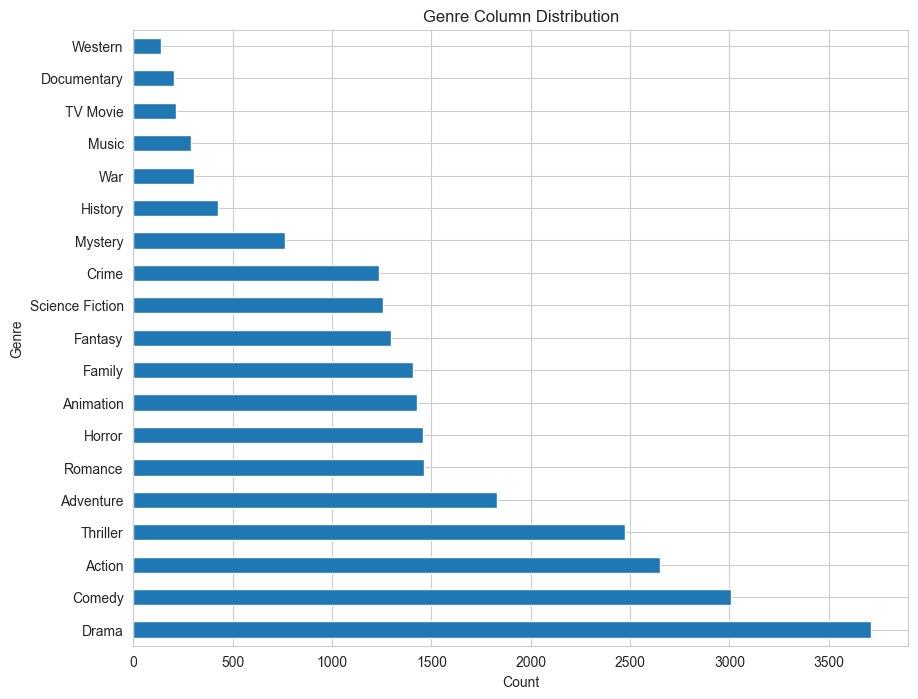

In [38]:
genre_counts.plot(kind='barh', figsize=(10,8))
plt.title('Genre Column Distribution')
plt.xlabel('Count')
plt.ylabel('Genre')
plt.show()


<h2>Q2. What genres has highest votes?</h2>

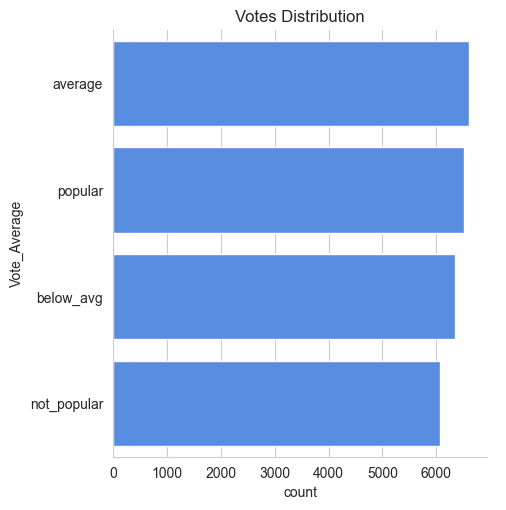

In [41]:
sns.catplot(
    y='Vote_Average',
    data=df,
    kind='count',
    order=df['Vote_Average'].value_counts().index,
    color='#4287f5'
)

plt.title('Votes Distribution')
plt.show()

<h2>Q3: What movie got the highest popularity? What its genre?</h2>

In [42]:
#checking ma popularity in dataset 
df[df['Popularity'] == df['Popularity'].max()]

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940,popular,[Action]
1,2021,Spider-Man: No Way Home,5083.954,8940,popular,[Adventure]
2,2021,Spider-Man: No Way Home,5083.954,8940,popular,[Science Fiction]


<h2>Q4:What movie got the lowest popularity? What's its genre?</h2>

In [43]:
df[df['Popularity'] == df['Popularity'].min()]

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
25546,2021,The United States vs. Billie Holiday,13.354,152,average,[Music]
25547,2021,The United States vs. Billie Holiday,13.354,152,average,[Drama]
25548,2021,The United States vs. Billie Holiday,13.354,152,average,[History]
25549,1984,Threads,13.354,186,popular,[War]
25550,1984,Threads,13.354,186,popular,[Drama]
25551,1984,Threads,13.354,186,popular,[Science Fiction]


<h2>Q5: Which year has the most filmmed movies?</h2>

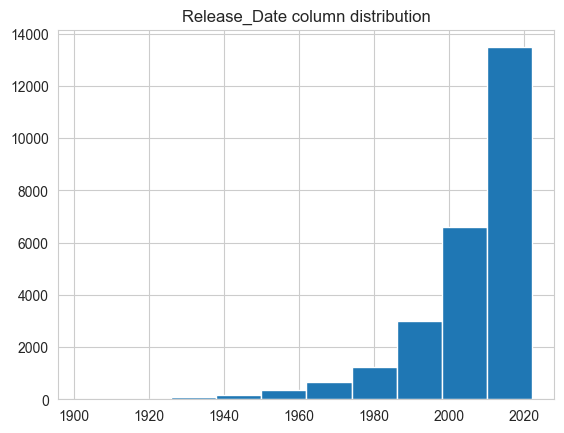

In [50]:
df['Release_Date'].hist()
plt.title('Release_Date column distribution')
plt.show()

<h2>Conclusion</h2>

<h2>Q1: What is the most frequent genre in the dataset?</h2>
Drama genre is the mostfrequent genre in our dataset and has appeared more than 14% of the times among 19 other genres.

<h2>Q2: What genres has highest votes?</h2>
We have 25.5% of our dataset with popular votes(6520 rows).Drama again gets the highest popularity among fans by being having more than 18.5% of movies popularities.

<h2>Q3: What movie got the highest popularity? What's its genre?</h2>
Spider-Man: No way Home has the highest popularity rate in our dataset and it has genres of Action,Adventure and Science Fiction.

<h2>Q4: What movie got the lowest popularity? What's its genre??</h2>
The United States, thread has the highest lowest rate in our dataset and it has genres of music,drama,war,sci-fi and history.

<h2>Q5: Which year has the most filmmed movies?</h2>
year 2020 has the highest filmming rate in our dataset.